<a href="https://colab.research.google.com/github/Ecaballero333/Obligatorio_ML/blob/develop/VallarinoIgnacio_CaballeroEduardo_Obligatorio_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obligatorio



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [2]:
from google.colab import files 


uploaded = files.upload()

Saving nuevo_dataset.csv to nuevo_dataset.csv


In [3]:
df=pd.read_csv("nuevo_dataset.csv", sep = ",")

## Funciones


In [4]:
def evaluateAccuracy(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print(f"ACCURACY TRAIN: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"ACCURACY TEST: {accuracy_score(y_test, y_test_pred):.4f}")
    print("\n")
    

## Análisis exploratorio

In [5]:
df.head(100)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,79510,Female,22,1,19.0,1,< 1 Year,No,54559.0,152.0,87,0
1,186555,Male,57,1,18.0,0,1-2 Year,Yes,33439.0,124.0,63,0
2,158037,Female,64,1,28.0,0,1-2 Year,Yes,39327.0,122.0,45,0
3,343706,Male,52,1,41.0,1,1-2 Year,No,26536.0,124.0,161,0
4,137903,Female,21,1,7.0,0,< 1 Year,No,28416.0,152.0,92,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,196823,Male,51,1,28.0,0,1-2 Year,Yes,54154.0,26.0,272,0
96,293262,Male,35,1,46.0,0,1-2 Year,No,22241.0,154.0,267,0
97,260666,Male,24,1,14.0,1,< 1 Year,No,16288.0,152.0,236,0
98,14316,Female,23,1,13.0,1,< 1 Year,No,28760.0,152.0,166,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93891 entries, 0 to 93890
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    93891 non-null  int64  
 1   Gender                93891 non-null  object 
 2   Age                   93891 non-null  int64  
 3   Driving_License       93891 non-null  int64  
 4   Region_Code           93891 non-null  float64
 5   Previously_Insured    93891 non-null  int64  
 6   Vehicle_Age           93891 non-null  object 
 7   Vehicle_Damage        93891 non-null  object 
 8   Annual_Premium        93891 non-null  float64
 9   Policy_Sales_Channel  93891 non-null  float64
 10  Vintage               93891 non-null  int64  
 11  Response              93891 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 8.6+ MB


### Convertir Variables

Variables que están definidas como número pero son categoricas:
* Driving_License: valores posibles -> 0 y 1
* Previously_Insured: valores posibles -> 0 y 1
* Response: Es el target. Valores posibles -> 0 y 1

Las pasamos a string (excepto "response") en un primer lugar para poder hacerlas Dummy y luego poder usarlas en analisis de correlacion. 

In [7]:
# Conversión variable categórica
df['Driving_License'] = df['Driving_License'].astype('str')
df['Previously_Insured'] = df['Previously_Insured'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93891 entries, 0 to 93890
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    93891 non-null  int64  
 1   Gender                93891 non-null  object 
 2   Age                   93891 non-null  int64  
 3   Driving_License       93891 non-null  object 
 4   Region_Code           93891 non-null  float64
 5   Previously_Insured    93891 non-null  object 
 6   Vehicle_Age           93891 non-null  object 
 7   Vehicle_Damage        93891 non-null  object 
 8   Annual_Premium        93891 non-null  float64
 9   Policy_Sales_Channel  93891 non-null  float64
 10  Vintage               93891 non-null  int64  
 11  Response              93891 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 8.6+ MB


In [8]:
# Creacion de dummies para variables categoricas.
dfDummy = pd.get_dummies(df, drop_first = True)
dfDummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93891 entries, 0 to 93890
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     93891 non-null  int64  
 1   Age                    93891 non-null  int64  
 2   Region_Code            93891 non-null  float64
 3   Annual_Premium         93891 non-null  float64
 4   Policy_Sales_Channel   93891 non-null  float64
 5   Vintage                93891 non-null  int64  
 6   Response               93891 non-null  int64  
 7   Gender_Male            93891 non-null  uint8  
 8   Driving_License_1      93891 non-null  uint8  
 9   Previously_Insured_1   93891 non-null  uint8  
 10  Vehicle_Age_< 1 Year   93891 non-null  uint8  
 11  Vehicle_Age_> 2 Years  93891 non-null  uint8  
 12  Vehicle_Damage_Yes     93891 non-null  uint8  
dtypes: float64(3), int64(4), uint8(6)
memory usage: 5.6 MB


### Outliers

In [9]:
dfDummy.describe(include = [np.number])

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
count,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000
mean,190515.346806,40.806520,26.556092,30983.086547,103.525716,154.679415,0.497492,0.570545,0.998477,0.264296,0.313481,0.068036,0.706532
std,109947.403429,14.368874,12.645412,17687.544914,55.814796,83.567929,0.499996,0.495001,0.038997,0.440960,0.463910,0.251810,0.455353
min,1.000000,20.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95254.500000,27.000000,16.000000,24506.000000,26.000000,82.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,190640.000000,41.000000,28.000000,32232.000000,124.000000,155.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,285907.500000,50.000000,34.000000,40299.000000,152.000000,227.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,381098.000000,85.000000,52.000000,540165.000000,163.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
from scipy.stats.mstats import winsorize

In [11]:
plt.figure(figsize = (3,5))
sns.set_theme(style="whitegrid")

<Figure size 216x360 with 0 Axes>

Outliers de variable Age


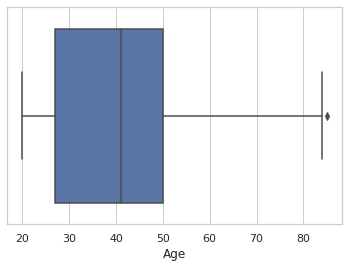

In [12]:
print('Outliers de variable Age')
sns.boxplot(x = 'Age', data = dfDummy)

Detecamos un outlier para la variable "Age". Procederemos a eliminarlo...


Outliers de variable AgeWinzorized


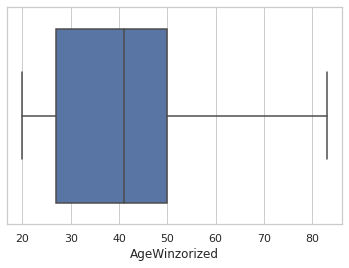

In [13]:
dfDummy['AgeWinzorized'] = winsorize(dfDummy['Age'], limits = [None, 0.0001])
print('Outliers de variable AgeWinzorized')
sns.boxplot(x = 'AgeWinzorized', data = dfDummy)

Outliers de variable Annual_Premium


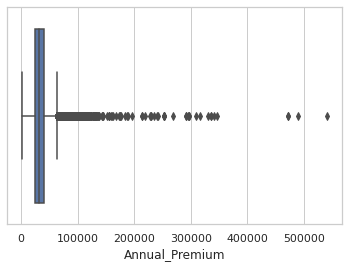

In [14]:
print('Outliers de variable Annual_Premium')
sns.boxplot(x = 'Annual_Premium', data = dfDummy)

Detectamos varios outliers para la variable "Annual_Premium". Procederemos a eliminarlos...

Outliers de variable Annual_PremiumWinzorized


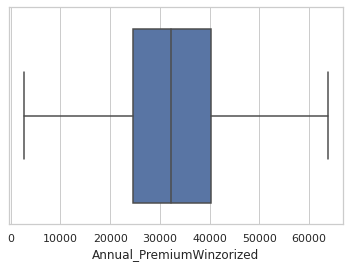

In [15]:
dfDummy['Annual_PremiumWinzorized'] = winsorize(dfDummy['Annual_Premium'], limits = [None, 0.025])
print('Outliers de variable Annual_PremiumWinzorized')
sns.boxplot(x = 'Annual_PremiumWinzorized', data = dfDummy)

Outliers de variable Vintage


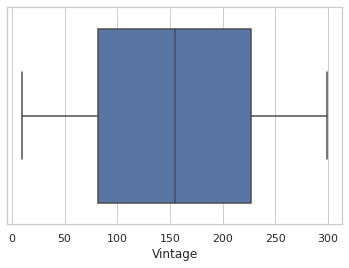

In [16]:
print('Outliers de variable Vintage')
sns.boxplot(x = 'Vintage', data = dfDummy)

Eliminamos las columnas que son "winzorized": Age y Annual_Premium

In [17]:
dfDummy = dfDummy.drop(['Age', 'Annual_Premium'], axis=1)

In [18]:
dfDummy

,id,Region_Code,Policy_Sales_Channel,Vintage,Response,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,AgeWinzorized,Annual_PremiumWinzorized
0,79510,19.0,152.0,87,0,0,1,1,1,0,0,22,54559.0
1,186555,18.0,124.0,63,0,1,1,0,0,0,1,57,33439.0
2,158037,28.0,122.0,45,0,0,1,0,0,0,1,64,39327.0
3,343706,41.0,124.0,161,0,1,1,1,0,0,0,52,26536.0
4,137903,7.0,152.0,92,0,0,1,0,1,0,0,21,28416.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93886,381058,46.0,26.0,189,1,1,1,0,0,0,1,40,27508.0
93887,381062,28.0,124.0,99,1,0,1,0,0,0,1,41,37377.0
93888,381074,28.0,124.0,167,1,0,1,0,0,0,1,46,34741.0
93889,381076,28.0,26.0,139,1,0,1,0,0,0,1,61,43875.0


### Filas repetidas

Según el reporte obtenido con pandas-profiling no hay filas repetidas. Igual probamos

In [19]:
print("Cantidad sin borrar",len(dfDummy))
dfDummy_without_duplicates = dfDummy.drop_duplicates()
print("Cantidad con borrado", len(dfDummy_without_duplicates))


Cantidad sin borrar 93891
Cantidad con borrado 93891


### Valores nulos

No hay variables nulas.

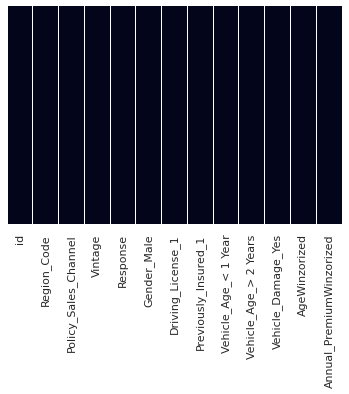

In [20]:
sns.heatmap(dfDummy.isnull(), cbar = False, yticklabels = False, xticklabels = True)

### Feature Scaling

Usamos la normalización porque:
-	No podemos asumir que la distribución de nuestros datos es gaussiana.
-	No tenemos outliers porque ya los eliminamos.

In [23]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [24]:
dfDummy_normAux = scaler.fit_transform(dfDummy)

In [25]:
dfDummy_normAux

array([[0.20863192, 0.36538462, 0.93209877, ..., 0.        , 0.03174603,
        0.84877658],
       [0.48951842, 0.34615385, 0.75925926, ..., 1.        , 0.58730159,
        0.50357137],
       [0.41468707, 0.53846154, 0.74691358, ..., 1.        , 0.6984127 ,
        0.5998104 ],
       ...,
       [0.99993702, 0.53846154, 0.75925926, ..., 1.        , 0.41269841,
        0.52485249],
       [0.99994227, 0.53846154, 0.15432099, ..., 1.        , 0.65079365,
        0.6741472 ],
       [1.        , 0.53846154, 0.15432099, ..., 1.        , 0.28571429,
        0.81907782]])

In [26]:
dfDummy_normalized = pd.DataFrame(dfDummy_normAux, columns = sorted(dfDummy))

In [27]:
dfDummy2 = pd.DataFrame(dfDummy, columns = sorted(dfDummy))
dfDummy2

,AgeWinzorized,Annual_PremiumWinzorized,Driving_License_1,Gender_Male,Policy_Sales_Channel,Previously_Insured_1,Region_Code,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Vintage,id
0,22,54559.0,1,0,152.0,1,19.0,0,1,0,0,87,79510
1,57,33439.0,1,1,124.0,0,18.0,0,0,0,1,63,186555
2,64,39327.0,1,0,122.0,0,28.0,0,0,0,1,45,158037
3,52,26536.0,1,1,124.0,1,41.0,0,0,0,0,161,343706
4,21,28416.0,1,0,152.0,0,7.0,0,1,0,0,92,137903
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93886,40,27508.0,1,1,26.0,0,46.0,1,0,0,1,189,381058
93887,41,37377.0,1,0,124.0,0,28.0,1,0,0,1,99,381062
93888,46,34741.0,1,0,124.0,0,28.0,1,0,0,1,167,381074
93889,61,43875.0,1,0,26.0,0,28.0,1,0,0,1,139,381076


In [28]:
dfDummy_normalized

,AgeWinzorized,Annual_PremiumWinzorized,Driving_License_1,Gender_Male,Policy_Sales_Channel,Previously_Insured_1,Region_Code,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Vintage,id
0,0.208632,0.365385,0.932099,0.266436,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.031746,0.848777
1,0.489518,0.346154,0.759259,0.183391,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.587302,0.503571
2,0.414687,0.538462,0.746914,0.121107,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.698413,0.599810
3,0.901883,0.788462,0.759259,0.522491,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.507937,0.390742
4,0.361855,0.134615,0.932099,0.283737,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.015873,0.421471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93886,0.999895,0.884615,0.154321,0.619377,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.317460,0.406630
93887,0.999906,0.538462,0.759259,0.307958,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.333333,0.567938
93888,0.999937,0.538462,0.759259,0.543253,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.412698,0.524852
93889,0.999942,0.538462,0.154321,0.446367,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.650794,0.674147


### Análisis de correlación

In [29]:
d_cor = dfDummy_normalized.corr()
d_cor

,AgeWinzorized,Annual_PremiumWinzorized,Driving_License_1,Gender_Male,Policy_Sales_Channel,Previously_Insured_1,Region_Code,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Vintage,id
AgeWinzorized,1.000000,-0.000327,0.001997,-0.002523,-0.003286,0.005085,-0.002911,0.003164,0.000701,-0.004702,-0.001973,0.002731,0.002147
Annual_PremiumWinzorized,-0.000327,1.000000,-0.035028,-0.005488,0.016278,-0.003781,0.003100,-0.023101,-0.034282,0.013191,0.025978,0.032374,-0.001270
Driving_License_1,0.001997,-0.035028,1.000000,0.003790,-0.207801,-0.090779,0.026948,0.228769,0.495390,-0.181666,-0.239369,-0.519569,-0.167470
Gender_Male,-0.002523,-0.005488,0.003790,1.000000,-0.006753,-0.001775,-0.001058,0.005661,0.003494,0.001171,-0.003744,-0.006477,0.000989
Policy_Sales_Channel,-0.003286,0.016278,-0.207801,-0.006753,1.000000,0.080682,0.016465,-0.588736,-0.341658,0.128924,0.595324,0.182061,0.033304
Previously_Insured_1,0.005085,-0.003781,-0.090779,-0.001775,0.080682,1.000000,-0.015677,-0.090274,-0.145536,0.049334,0.096432,0.131681,0.008915
Region_Code,-0.002911,0.003100,0.026948,-0.001058,0.016465,-0.015677,1.000000,0.000492,0.026392,-0.000294,-0.001779,-0.064070,-0.007420
Response,0.003164,-0.023101,0.228769,0.005661,-0.588736,-0.090274,0.000492,1.000000,0.403296,-0.161272,-0.853874,-0.261900,-0.010180
Vehicle_Age_< 1 Year,0.000701,-0.034282,0.495390,0.003494,-0.341658,-0.145536,0.026392,0.403296,1.000000,-0.182579,-0.415373,-0.732124,-0.030455
Vehicle_Age_> 2 Years,-0.004702,0.013191,-0.181666,0.001171,0.128924,0.049334,-0.000294,-0.161272,-0.182579,1.000000,0.173856,0.246683,0.101323


In [31]:
paletaColores = sns.diverging_palette(0, 100, sep = 10, as_cmap = False)

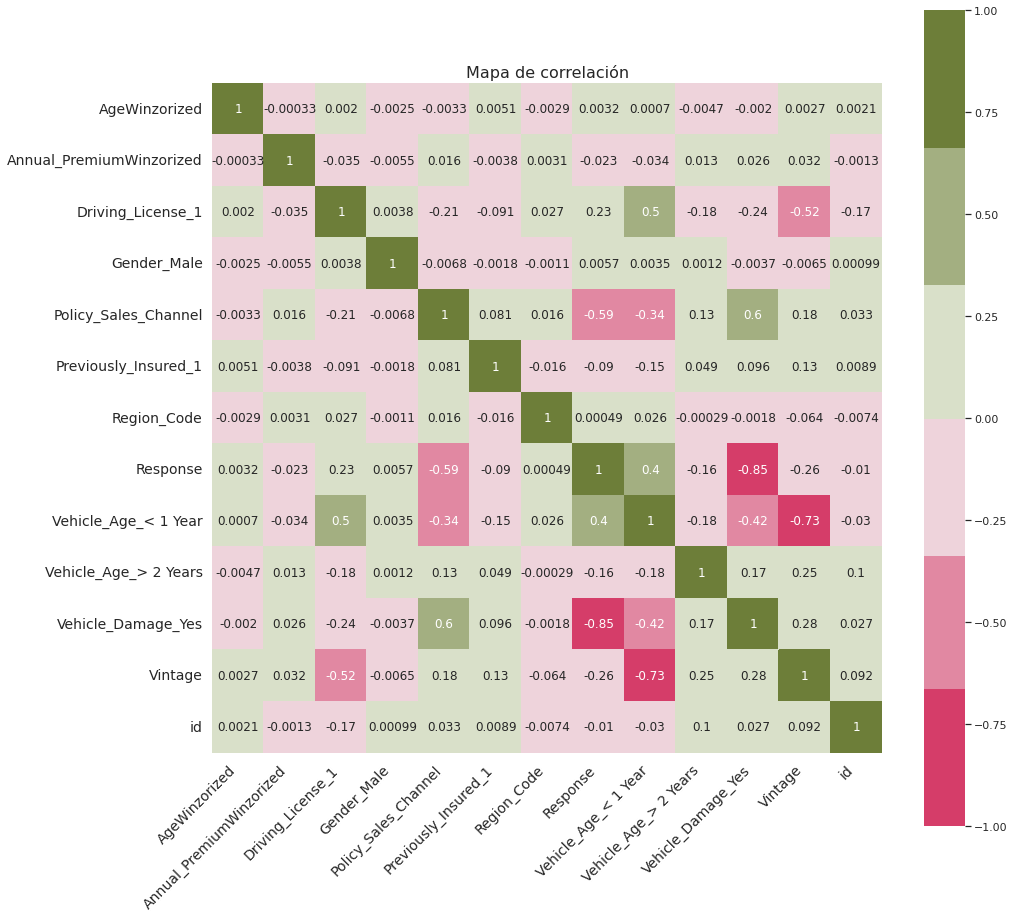

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
sns.heatmap(
    dfDummy_normalized.corr(),
    annot     = True,
    annot_kws = {"size": 12},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = paletaColores,
    square    = True,
    ax        = ax
).set_title("Mapa de correlación", fontsize = 16)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 14)

Consideramos una alta correlacion cuando el valor supera 0.68. Por otro lado, no tomamos en cuenta la variable "Response".Por lo tanto las correlaciones existentes son:

*   Vintage --> Vehicle_Age_> 1 Years

Dado a que Vehicle_Age_> 1 Years contiene menos correlacion con las demas variables, procedemos a eliminar Vintage para tener un cuadro menor de correlacion. 



####	Eliminación de variables altamente correlacionadas

In [35]:
df_sin_corr = dfDummy_normalized

df_sin_corr = df_sin_corr.drop(columns=['Vintage'])

df_sin_corr.corr()

,AgeWinzorized,Annual_PremiumWinzorized,Driving_License_1,Gender_Male,Policy_Sales_Channel,Previously_Insured_1,Region_Code,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,id
AgeWinzorized,1.000000,-0.000327,0.001997,-0.002523,-0.003286,0.005085,-0.002911,0.003164,0.000701,-0.004702,-0.001973,0.002147
Annual_PremiumWinzorized,-0.000327,1.000000,-0.035028,-0.005488,0.016278,-0.003781,0.003100,-0.023101,-0.034282,0.013191,0.025978,-0.001270
Driving_License_1,0.001997,-0.035028,1.000000,0.003790,-0.207801,-0.090779,0.026948,0.228769,0.495390,-0.181666,-0.239369,-0.167470
Gender_Male,-0.002523,-0.005488,0.003790,1.000000,-0.006753,-0.001775,-0.001058,0.005661,0.003494,0.001171,-0.003744,0.000989
Policy_Sales_Channel,-0.003286,0.016278,-0.207801,-0.006753,1.000000,0.080682,0.016465,-0.588736,-0.341658,0.128924,0.595324,0.033304
Previously_Insured_1,0.005085,-0.003781,-0.090779,-0.001775,0.080682,1.000000,-0.015677,-0.090274,-0.145536,0.049334,0.096432,0.008915
Region_Code,-0.002911,0.003100,0.026948,-0.001058,0.016465,-0.015677,1.000000,0.000492,0.026392,-0.000294,-0.001779,-0.007420
Response,0.003164,-0.023101,0.228769,0.005661,-0.588736,-0.090274,0.000492,1.000000,0.403296,-0.161272,-0.853874,-0.010180
Vehicle_Age_< 1 Year,0.000701,-0.034282,0.495390,0.003494,-0.341658,-0.145536,0.026392,0.403296,1.000000,-0.182579,-0.415373,-0.030455
Vehicle_Age_> 2 Years,-0.004702,0.013191,-0.181666,0.001171,0.128924,0.049334,-0.000294,-0.161272,-0.182579,1.000000,0.173856,0.101323


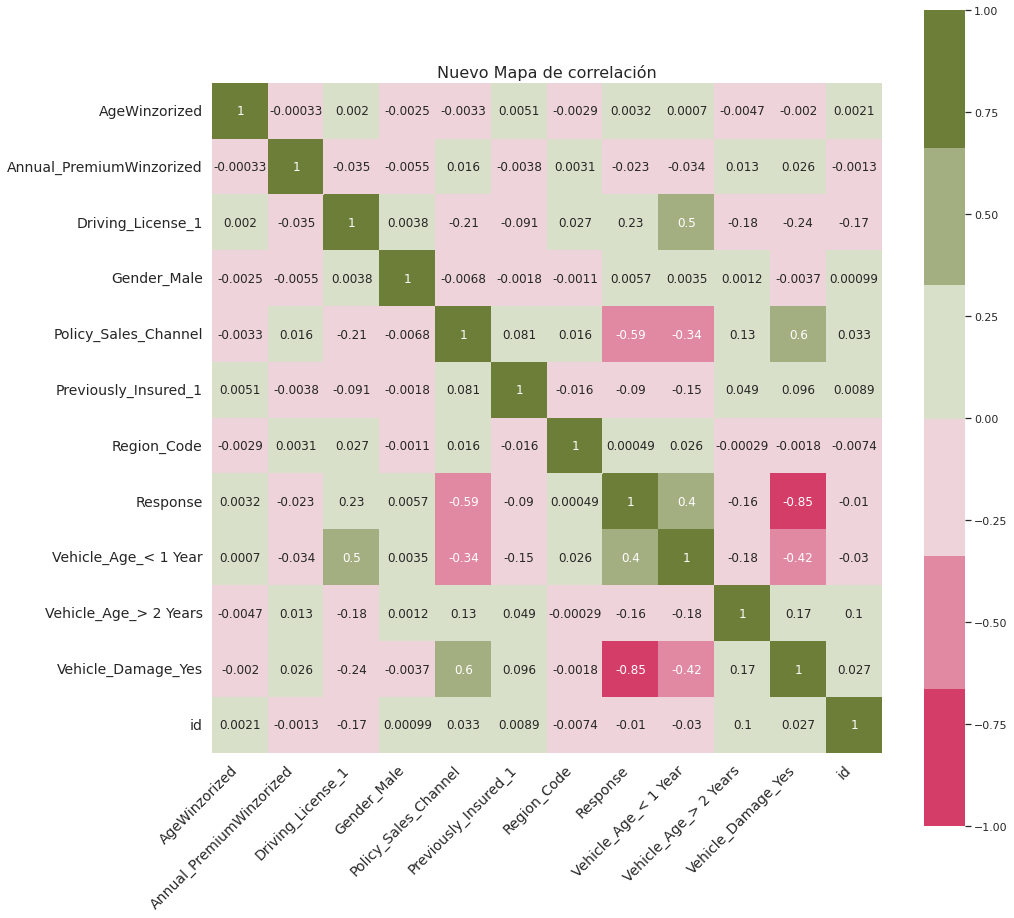

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
sns.heatmap(
    df_sin_corr.corr(),
    annot     = True,
    annot_kws = {"size": 12},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = paletaColores,
    square    = True,
    ax        = ax
).set_title("Nuevo Mapa de correlación", fontsize = 16)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 14)